In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
from fastai import *
from fastai.vision import *

In [13]:
from IPython.display import JSON

In [16]:
coco = untar_data(URLs.COCO_TINY)
imgs, lbl_bbox = get_annotations(coco/'train.json')

In [20]:
img2bbox = {img:bb for img, bb in zip(imgs, lbl_bbox)}
get_y_fn = lambda o: img2bbox[o.name]

In [25]:
data = (ObjectItemList.from_folder(coco)
        .split_by_rand_pct(0.2)
        .label_from_func(get_y_fn)
        .transform(get_transforms(), tfm_y=True)
        .databunch(bs=16, collate_fn=bb_pad_collate))

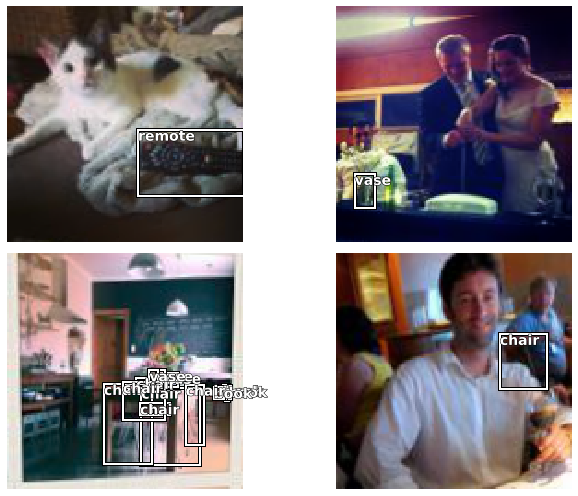

In [29]:
data.show_batch(rows=2, figsize=(10, 7))

In [31]:
learn = cnn_learner(data, models.resnet34)

In [32]:
lr_find(learn)
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


TypeError: __call__() takes 3 positional arguments but 4 were given